# Bunch to Bunch Prediction Dataset Preprocessing
**Motivation:**
For this project, I thought it is appropriate to use CNN to to regresison. Thus, I will have a 50x40 (for 2000 particles in a bunch) 2D tensor holder with 6 channels (x,y,z,px,py,pz) and output 12k (2k * 6) results and then minimize the mean square error on this results. 

**New Input Data Format:** <br>

Input file is shape (N,M,50,40)

N - sample number, i.e. individual electron bunches <br>
M - 0 -> 6 to access each dimension (x,y,z,px,py,pz respectively) <br>
50x40 - size of the 2D tensor holder <br>


In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# convenience for loading different data sets
useset={'full':0,'subset':1,'downsample':2,'subset_downsample':3}
namelist = [('positions','momenta'),('pos_ss','mom_ss'),('pos_ds','mom_ds'),('pos_ssds','mom_ssds')]

In [3]:
#specify path to the data files
path_files = '/Users/duc_hoang/Box Sync/Fermilab Summer Research/SLAC mini project/'

# specify dataset to use and load
# options are 'full', 'subset', 'downsample', and 'subset_downsample' as described above
set_to_use = 'subset_downsample'

IN_pos = np.load(path_files +'IN_'+ namelist[useset[set_to_use]][0] + '.npy')
IN_mom = np.load(path_files +'IN_'+ namelist[useset[set_to_use]][1] + '.npy')
OUT_pos = np.load(path_files +'OUT_'+ namelist[useset[set_to_use]][0] + '.npy')
OUT_mom = np.load(path_files +'OUT_'+ namelist[useset[set_to_use]][1] +'.npy')

In [4]:
#Concatenate position and momentum together 
IN_CNN = np.concatenate((IN_pos,IN_mom), axis = 1) #Output matrix shape = (_,6,_)

In [5]:
#Check if dimensions are concatenated correctly
print(IN_CNN[:,5,:] == IN_mom[:,2,:])
print(IN_CNN[:,4,:] == IN_mom[:,1,:])
print(IN_CNN[:,0,:] == IN_pos[:,0,:])

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [7]:
#Reshape to final shape, which is (_,_,50,40)
_IN_CNN = np.reshape(IN_CNN, (IN_CNN.shape[0],IN_CNN.shape[1], 50, 40))

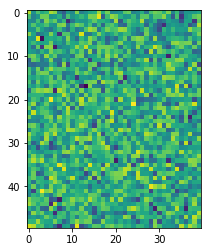

In [39]:
plt.imshow(_IN_CNN[0][3][:][:])

In [24]:
#Doesn't really make sense to human eyes but let's see if the neural net can detect it

In [32]:
#Test
_IN_CNN[14997][5][1][1] == IN_CNN[14997][5][41]

True

In [33]:
#Export to a 'npy' file
#np.save('IN_CNN.npy', _IN_CNN)

In [36]:
#Now process the output which will have just 2 dimension (sample index, flattened data)
OUT_CNN = np.concatenate((OUT_pos,OUT_mom), axis = 1)
_OUT_CNN = np.reshape(OUT_CNN, (OUT_CNN.shape[0],OUT_CNN.shape[1]*OUT_CNN.shape[2]))

In [42]:
#Export to a 'npy' file
#np.save('OUT_CNN.npy', _OUT_CNN)

In [44]:
test = np.load('IN_CNN.npy')